In [9]:
import numpy as np
import scipy.io as sio
import os
import pandas as pd

# Load the .mat files
data = sio.loadmat('Hadza_w_name.mat')

In [57]:
genomes = np.array([gen_name[0] for gen_name in data['genomes'].flatten()])
usamples = np.array([sample_name[0] for sample_name in data['usamples'].flatten()])
relabus = data['relabus']
kegg_per_genome = data['keggs_per_genome']
genome2name = data['genome2name']


In [58]:
inds2del = np.all(relabus <= 1e-6, axis=1)  # Identify rows with all values <= 1e-6
relabus = relabus[~inds2del, :]  # Remove these rows from relabus
genomes = genomes[~inds2del]
genome2name = genome2name[~inds2del,:]
G = kegg_per_genome > 0
G = G[~inds2del, :]


coverage_genome = np.any(kegg_per_genome>0, axis=1)


coverage = np.sum(relabus[coverage_genome,:], axis=0)
inds2del = coverage < 0.8
relabus = relabus[:,~inds2del]
usamples = usamples[~inds2del]

relabus = relabus[coverage_genome,:]
genomes = genomes[coverage_genome]
genome2name = genome2name[coverage_genome]

relabus = np.nan_to_num(relabus)  # Replace NaNs with 0
relabus = relabus / np.sum(relabus, axis=0, keepdims=True)  # Normalize relabus

keggs = np.array([i for i in range(0,int(data['max_ko_num']))]).T
inds2del = np.sum(G, axis=0) == 0  # Identify columns in G where the sum is 0
G = G[:, ~inds2del]  # Remove these columns from G
keggs = keggs[~inds2del]  # Remove corresponding elements from keggs


In [59]:
mEQO_selected = pd.read_csv('temp.csv')
mEQO_selected = np.array(mEQO_selected)[:,1]

In [62]:
data2 = pd.read_csv('Vanish_Blossom.csv')

In [91]:
Genome = np.array(data2['Genome']).astype(str)
Van_bloss = np.array(data2['Special Taxa?']).astype(str)
Van_bloss_percent = np.array(data2['Percentile Rank']).astype(float)

In [120]:
np.where(Genome == genomes[2])

(array([], dtype=int64),)

In [127]:
import matplotlib.pyplot as plt
percent = np.zeros(len(genomes))
for i, name in enumerate(genomes):
    inds = np.where(Genome == name)
    if all(len(indices) == 0 for indices in inds) == True:
        percent[i] = -200
    else:
        percent[i] = Van_bloss_percent[inds]

In [171]:
pd.DataFrame(percent).to_csv('1.csv')

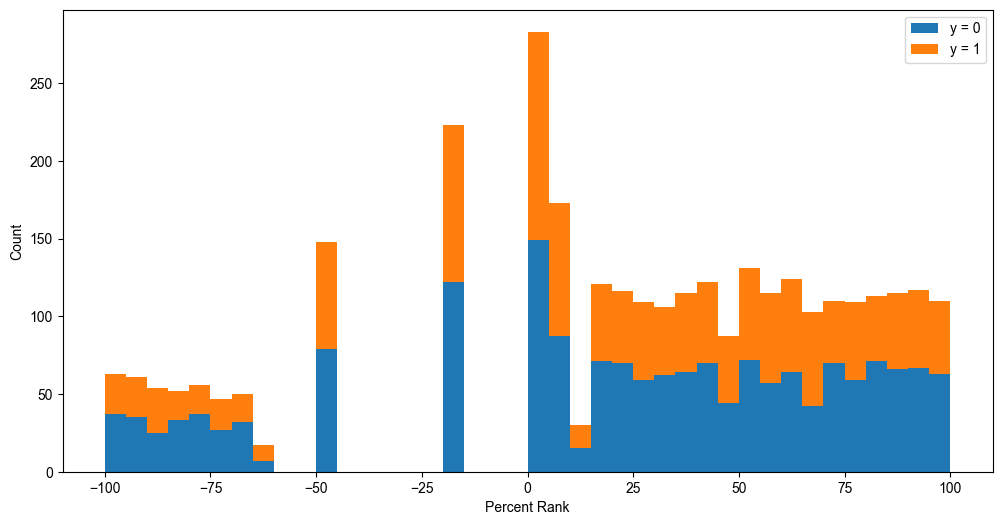

In [151]:
plt.rcParams['font.family'] = 'Arial'
bins = np.arange(-105, 105, 5)  # 每 5 个值分一组，范围从 -110 到 110

# 统计每组中 y 为 0 和 y 为 1 的数量
counts_0, _ = np.histogram(percent[mEQO_selected == 0], bins=bins)
counts_1, _ = np.histogram(percent[mEQO_selected == 1], bins=bins)

# 绘制堆叠柱状图
plt.figure(figsize=(12, 6))

# 绘制 y 为 0 的柱状图
plt.bar(bins[:-1], counts_0, width=5, align='edge', label='y = 0')

# 在 y 为 0 的柱状图上堆叠 y 为 1 的柱状图
plt.bar(bins[:-1], counts_1, width=5, align='edge', bottom=counts_0, label='y = 1')

# 设置 x 轴的范围
plt.xlim(-110, 110)

plt.xlabel('Percent Rank')
plt.ylabel('Count')
plt.legend()

# 显示图形
plt.show()